<a href="https://colab.research.google.com/github/Valeeew/Analyze-bookstore-sales/blob/main/correlation_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Analyse & corrélation__
>## __Par Valentin Monteiro__

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!git clone -l -s git://github.com/Valeeew/Analyze-bookstore-sales cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 61 (delta 37), reused 16 (delta 6), pack-reused 0
Receiving objects: 100% (61/61), 18.47 MiB | 2.70 MiB/s, done.
Resolving deltas: 100% (37/37), done.
/content/cloned-repo
correlation_testing.ipynb  products.csv		Turnover_analyze.ipynb
customers.csv		   Sales_analyze.ipynb
DATA_library.csv	   transactions.csv


In [ ]:
df = pd.read_csv("DATA_library.csv")
df = df.set_index("Unnamed: 0")
# Je decide de supprimer le 4 gros client, je pense que ces DATA peut avoir une net influence sur me corrélation
dfall = df 
df = df[(df.client_id.isin(["c_1609","c_3454","c_4958","c_6714"]))==False]
df

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,class_age
Unnamed: 0,,,,,,,,,,
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,37,35-39
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,3.99,0.0,f,1986,37,35-39
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,13.21,0.0,f,1986,37,35-39
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,19.37,0.0,f,1986,37,35-39
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,8.99,0.0,f,1986,37,35-39
...,...,...,...,...,...,...,...,...,...,...
679327,0_1509,2021-05-15 08:17:35.835342,s_34762,c_8114,4.99,0.0,m,1962,61,60-64
679328,1_152,2021-11-08 17:12:27.637349,s_116675,c_240,11.06,1.0,m,1998,25,25-29
679329,2_207,2021-06-01 04:31:16.088314,s_42418,c_305,50.99,2.0,f,1996,27,25-29


In [ ]:
df.corr()

,price,categ,birth,age
price,1.000000,0.669363,0.197664,-0.197664
categ,0.669363,1.000000,0.084258,-0.084258
birth,0.197664,0.084258,1.000000,-1.000000
age,-0.197664,-0.084258,-1.000000,1.000000


In [ ]:
dfall.corr()

,price,categ,birth,age
price,1.000000,0.671767,0.209439,-0.209439
categ,0.671767,1.000000,0.099222,-0.099222
birth,0.209439,0.099222,1.000000,-1.000000
age,-0.209439,-0.099222,-1.000000,1.000000


In [ ]:
def comatrix(data_frame):
  mask = np.triu(np.ones_like(data_frame.corr(), dtype=bool))
  plt.figure(figsize = [12,8])
  sns.heatmap(data_frame.corr(),mask=mask, center=0, cmap="RdBu", linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
  plt.show()

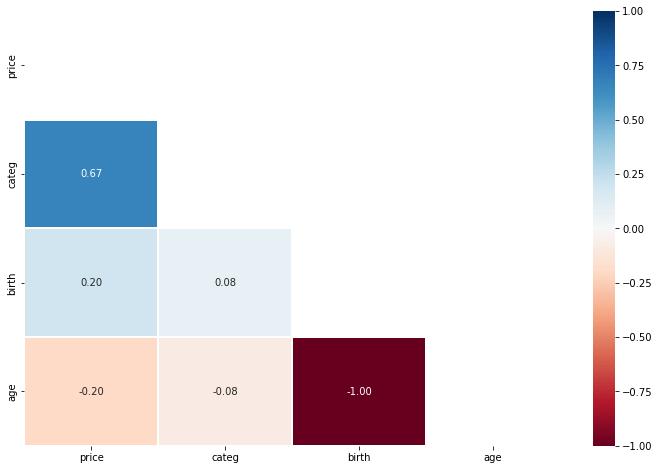

In [ ]:
comatrix(df)
# Matrice de corrélation de Pearson

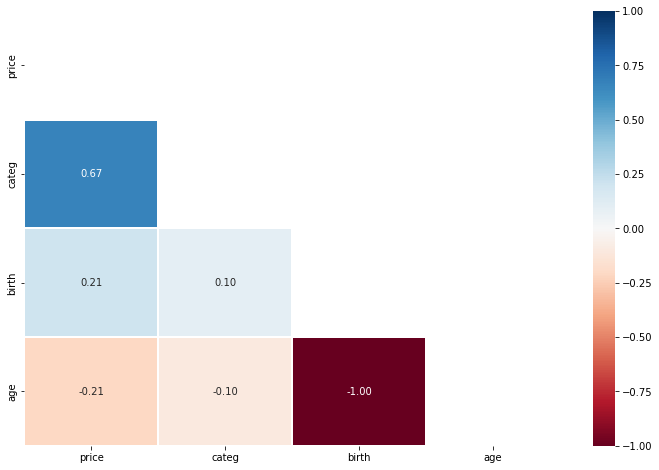

In [ ]:
comatrix(dfall)
# Matrice de corrélation de Pearson

## __Test de Corrélation ; Sexe & Catégorie__

> Avec pour hypothèse H0 ➡️ les 2 variable sont indépendantes, donc pas corrélé.
<br> Seuil de risque fixé à 5% d'erreur

[Cours source >>>](https://www.youtube.com/watch?v=iNbCaR2Ven8)

In [ ]:
# Création table pivot (tableau croisé)
corr_sex_categ = df[["sex","categ"]].pivot_table(index="sex",columns="categ", aggfunc=len, margins=True, margins_name="Total")

In [ ]:
# Test de Khi2 car les deux variable sont des qualitative
from scipy import stats #as chi2_contingency
khi2, p_value, dof, exp = stats.chi2_contingency(corr_sex_categ)

In [ ]:
print("khi2 =",khi2,"\np_value =", p_value)

khi2 = 20.200173796862927 
p_value = 0.002551063708568263


In [ ]:
dof

6

In [ ]:
expectation = pd.DataFrame(exp, index=["f","m","Total"], columns=["0.0","1.0","2.0","Total"])
np_corr_sex_categ = corr_sex_categ.to_numpy()
np_corr_sex_categ

array([[200904, 111331,  16980, 329215],
       [186589, 101017,  15868, 303474],
       [387493, 212348,  32848, 632689]])

In [ ]:
corr_sex_categ

categ,0.0,1.0,2.0,Total
sex,,,,
f,200904,111331,16980,329215
m,186589,101017,15868,303474
Total,387493,212348,32848,632689


In [ ]:
x2 = ((np_corr_sex_categ-exp)**2)/exp

In [ ]:
x2 = pd.DataFrame(x2, index=["f","m","Total_y"], columns=("0","1","2","Total_x"))
#x2 = x2.drop("Total_y")
#x2 = x2.drop("Total_x", axis=1)
x2 

,0,1,2,Total_x
f,2.607546,6.344940,0.736678,0.0
m,2.828720,6.883125,0.799164,0.0
Total_y,0.000000,0.000000,0.000000,0.0


In [ ]:
mesure = x2.sum().sum()

In [ ]:
reslt = exp/x2.to_numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
reslt = x2/mesure
reslt = reslt.drop("Total_y")
reslt = reslt.drop("Total_x", axis=1)

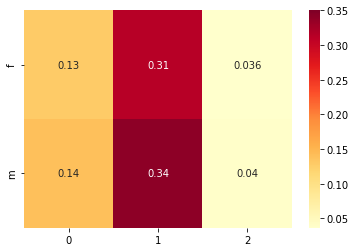

In [ ]:
sns.heatmap(reslt, cmap=("YlOrRd"), annot=reslt, vmax=0.35)

## __Test de corrélation ; Age & C.A.__
> H0 ➡️ Refus de corrélation
<br> Seuil de risque fixé à 5% d'erreur


In [ ]:
corr_age_ca = df[["age","price"]]
corr_age_ca = corr_age_ca.groupby("age").agg({"price":"sum"}).reset_index()
corr_age_ca

,age,price
0,19,609013.690000
1,20,178195.780000
2,21,184209.264564
3,22,178497.700000
4,23,165029.256376
...,...,...
71,90,5264.988188
72,91,5043.190000
73,92,2815.450000
74,93,4013.870000


<function matplotlib.pyplot.show>

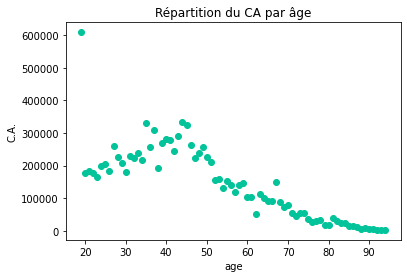

In [ ]:
plt.plot(corr_age_ca.age,corr_age_ca.price,"o", color="#02c39a")
plt.xlabel("age")
plt.ylabel("C.A.")
plt.title("Répartition du CA par âge")
plt.show

In [ ]:
coefcorr_age_ca , p_value = stats.spearmanr(corr_age_ca.age,corr_age_ca.price)

In [ ]:
p_value

7.352708223159905e-25

In [ ]:
coefcorr_age_ca

-0.8736842105263158

## __Test de corrélation ; Age & fréquence d'achat__

In [ ]:
stats.spearmanr()